<a href="https://colab.research.google.com/github/moviedatascience/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/LS_DS_112_Loading_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading Datasets

This assignment is purposely semi-open-ended you will be asked to load datasets both from github and also from CSV files from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Remember that the UCI datasets may not have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally, on github, using the `!curl` shell command, or in some other way before you try and read it in as a dataframe, this will help you catch what would otherwise be unforseen problems.


## 1) Load a dataset from Github (via its *RAW* URL)

Pick a dataset from the following repository and load it into Google Colab. Make sure that the headers are what you would expect and check to see if missing values have been encoded as NaN values:

<https://github.com/ryanleeallred/datasets>

In [23]:
import pandas as pd

dataset_url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/churn.csv'
#so this na_values worked for me but not for Ryan and he didn't say why
df = pd.read_csv(dataset_url, na_values='?')
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415.0,382-4657,no,yes,25,265.1,110,NaN,197.4,99.0,16.78,244.7,91,11.01,10.0,3.0,2.70,1,False.
1,OH,107,415.0,371-7191,no,yes,26,161.6,123,NaN,195.5,103.0,16.62,254.4,103,11.45,13.7,3.0,3.70,1,False.
2,NJ,137,415.0,358-1921,no,no,0,243.4,114,NaN,121.2,110.0,10.30,162.6,104,7.32,12.2,5.0,3.29,0,False.
3,OH,84,408.0,375-9999,yes,no,0,299.4,71,50.90,61.9,88.0,5.26,196.9,89,8.86,6.6,7.0,1.78,2,False.
4,OK,75,415.0,330-6626,yes,no,0,166.7,113,28.34,148.3,122.0,12.61,186.9,121,8.41,10.1,3.0,2.73,3,False.


## 2) Load a dataset from your local machine
Download a dataset from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) and then upload the file to Google Colab either using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

While you are free to try and load any dataset from the UCI repository, I strongly suggest starting with one of the most popular datasets like those that are featured on the right-hand side of the home page. 

Some datasets on UCI will have challenges associated with importing them far beyond what we have exposed you to in class today, so if you run into a dataset that you don't know how to deal with, struggle with it for a little bit, but ultimately feel free to simply choose a different one. 

- Make sure that your file has correct headers, and the same number of rows and columns as is specified on the UCI page. If your dataset doesn't have headers use the parameters of the `read_csv` function to add them. Likewise make sure that missing values are encoded as `NaN`.

In [16]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank.csv


In [22]:
#learning the sep parameter was really nice! I wasn't exactly sure why 
# this dataset wasn't loading correctly at first 
df2 = pd.read_csv('bank.csv', sep=';', na_values='unknown')

df2.head()
# df2.shape

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,NaN,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,NaN,3,jun,199,4,-1,0,NaN,no
4,59,blue-collar,married,secondary,no,0,yes,no,NaN,5,may,226,1,-1,0,NaN,no


## 3) Load a dataset from UCI using `!wget`

"Shell Out" and try loading a file directly into your google colab's memory using the `!wget` command and then read it in with `read_csv`.

With this file we'll do a bit more to it.

- Read it in, fix any problems with the header as make sure missing values are encoded as `NaN`.
- Use the `.fillna()` method to fill any missing values. 
 - [.fillna() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
- Create one of each of the following plots using the Pandas plotting functionality:
 - Scatterplot
 - Histogram
 - Density Plot


In [31]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
  
df2 = pd.read_csv('bank.csv', sep=';', na_values='unknown')

df2.fillna(method='ffill')

--2019-08-06 22:29:24--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 579043 (565K) [application/x-httpd-php]
Saving to: ‘bank.zip.7’

bank.zip.7          100%[===================>] 565.47K  1.77MB/s    in 0.3s    

2019-08-06 22:29:25 (1.77 MB/s) - ‘bank.zip.7’ saved [579043/579043]



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,NaN,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,cellular,3,jun,199,4,-1,0,failure,no
4,59,blue-collar,married,secondary,no,0,yes,no,cellular,5,may,226,1,-1,0,failure,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,other,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,cellular,14,may,57,2,-1,0,other,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


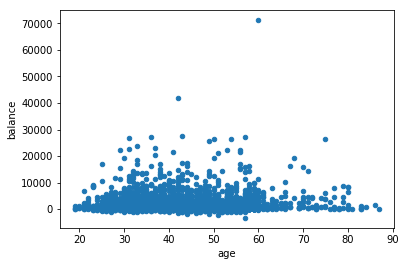

In [35]:
df2.plot.scatter('age', 'balance')

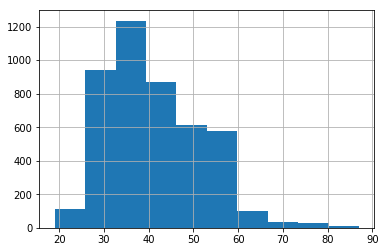

In [32]:
df2['age'].hist()

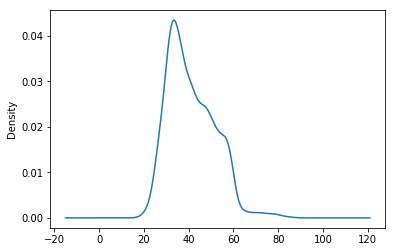

In [33]:
df2['age'].plot.density()

## Stretch Goals - Other types and sources of data

Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.